### Tarea 5 - Agrupamiento

En este apartado buscaremos agrupara a los jugadores por sus diferentes caracteristicas e interpretar estas agrupaciones

c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

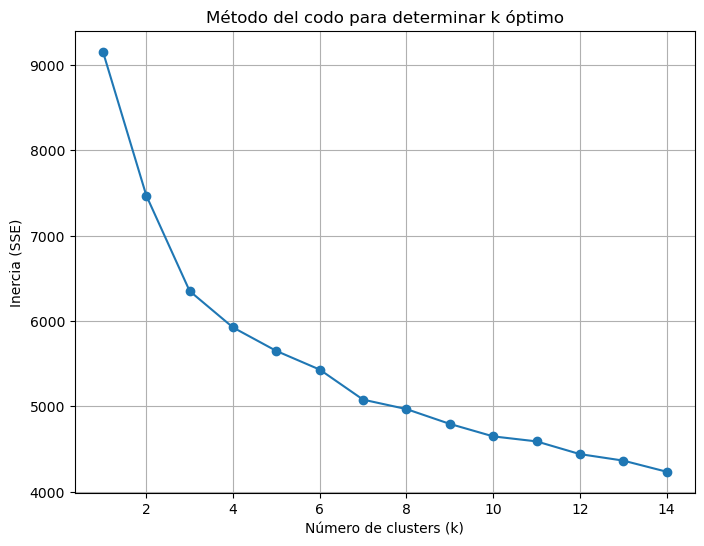

c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

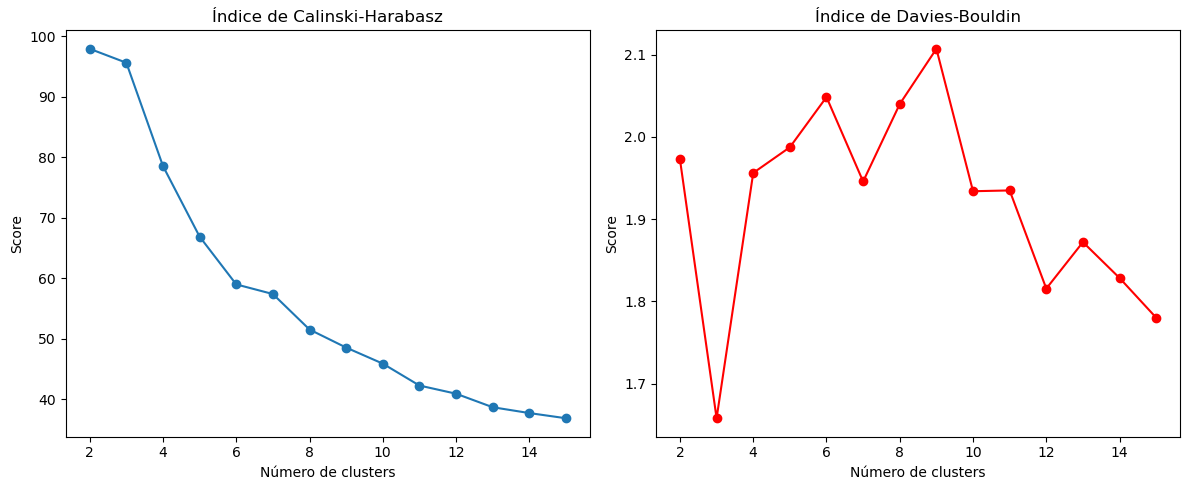

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

M_Final_DB = pd.read_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB_Modificado.csv')
M_Final_DB_Num = M_Final_DB.drop(['Player','G','Pos'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(M_Final_DB_Num.drop(['WS','Salary'],axis=1))

inercia = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # o X_pca si usaste PCA
    inercia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(K, inercia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del codo para determinar k óptimo")
plt.grid(True)
plt.show()


ch_scores = []
db_scores = []
k_range = range(2, 16)


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

# Graficar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title("Índice de Calinski-Harabasz")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.subplot(1, 2, 2)
plt.plot(k_range, db_scores, marker='o', color='red')
plt.title("Índice de Davies-Bouldin")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


En este caso del método de codo econtramos dos puntos de inflexion el primero es cerca del nivel 3 y el siguiente es cercano al punto6.

Calinski-Harabas mide la dispersión de los clusters y podemos interpretarlo como que a mayor valor, mayor dispersion entre los clusters. Mientras que Davies-Bouldin mide la dispersión interna del cluster lo que nos hace buscar un valor bajo pues este representa una mejo compacidad.

En este caso observamos que los 3 ejemplos coinciden en el punto 3, dado que este punto seria muy restrictivo para acomodar a todos los jugadores agregaremos a la prueba un cluster 6

In [8]:
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)
BD_Cluster = M_Final_DB.copy()
BD_Cluster["Cluster"] = labels_final

k_optimo = 6
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)
BD_Cluster["Cluster B"] = labels_final
BD_Cluster.head()

c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Unnamed: 0,Player,WS,USG%,BPM,VORP,PER,Age,G,2PA,...,STL,BLK,TOV,PF,PTS,Pos,Salary,Reliability,Cluster,Cluster B
0,0,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,26,76,22.6,...,2.4,1.4,3.4,3.0,45.9,G,35859950.0,0.926829,2,2
1,1,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,29,70,19.3,...,2.4,0.8,4.3,3.0,38.7,C-F,51415938.0,0.853659,2,2
2,2,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,26,82,13.3,...,1.6,1.5,2.0,2.7,23.1,C-F,20000000.0,1.000000,0,4
3,3,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,30,67,26.3,...,1.2,1.6,4.3,3.3,42.7,F-G,48787676.0,0.817073,2,2
4,4,Tyrese Haliburton,10.4,21.6,5.8,4.9,21.8,24,73,8.7,...,2.1,1.0,2.4,1.8,26.6,G,42176000.0,0.890244,2,5


In [9]:
Cluster_3 = BD_Cluster.drop(['Player','G','Cluster B','WS','Salary','Pos'],axis=1).groupby('Cluster').mean().round(2)
Cluster_3['Modelo'] = 3
Cluster_6 = BD_Cluster.drop(['Player','G','Cluster','WS','Salary','Pos'],axis=1).groupby('Cluster B').mean().round(2)
Cluster_6['Modelo'] = 6
Cluster_Final = pd.concat([Cluster_3,Cluster_6])
Cluster_Final

,Unnamed: 0,USG%,BPM,VORP,PER,Age,2PA,2P%,3PA,3P%,...,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Reliability,Modelo
0,198.19,16.71,-0.17,0.57,16.40,25.86,11.06,0.61,3.55,0.24,...,4.60,9.43,3.48,1.56,2.03,2.38,5.03,19.62,0.64,3
1,262.58,17.06,-2.00,0.13,11.48,25.92,7.45,0.51,8.20,0.35,...,1.75,5.37,4.44,1.70,0.71,2.25,3.75,18.48,0.65,3
2,114.84,26.73,2.33,2.18,19.02,26.84,14.43,0.54,8.92,0.36,...,1.74,6.98,7.24,1.65,0.84,3.67,3.29,30.86,0.74,3
0,191.15,17.33,0.36,0.73,15.76,25.97,9.83,0.60,5.80,0.35,...,3.46,8.24,3.92,1.83,1.65,2.31,4.72,20.50,0.66,6
1,238.18,15.45,-1.72,0.19,11.22,26.54,6.21,0.51,8.21,0.36,...,1.68,5.21,4.01,1.67,0.72,1.85,3.72,17.25,0.69,6
2,107.39,30.33,5.20,3.41,24.66,25.83,19.07,0.58,6.58,0.30,...,3.06,10.59,6.13,1.65,1.64,3.69,3.57,36.56,0.61,6
3,337.72,22.02,-2.90,-0.10,11.97,24.51,10.82,0.48,8.62,0.32,...,1.65,5.58,5.84,1.70,0.59,3.43,3.74,22.31,0.53,6
4,165.76,15.59,-0.31,0.63,17.02,26.55,12.43,0.61,0.79,0.10,...,5.75,10.27,3.46,1.29,2.23,2.48,5.01,18.27,0.68,6
5,76.68,26.49,2.19,2.30,18.53,27.26,13.52,0.53,9.80,0.37,...,1.36,6.03,7.63,1.60,0.61,3.59,3.03,30.70,0.80,6


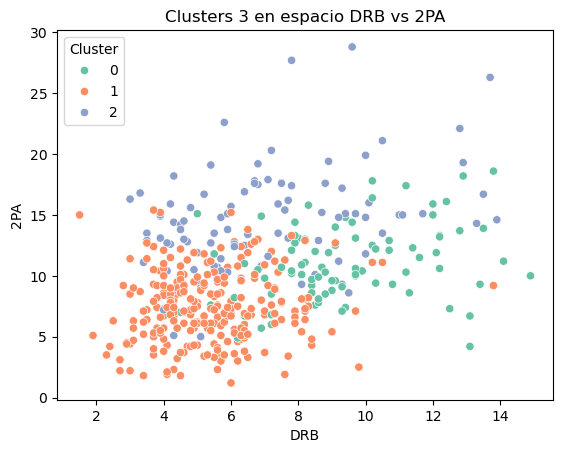

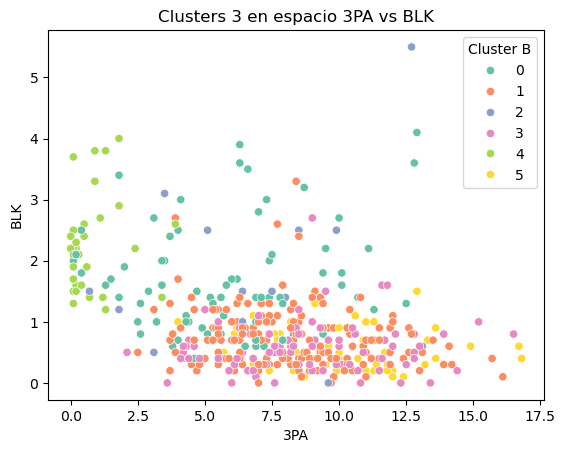

In [10]:
import seaborn as sns

sns.scatterplot(data=BD_Cluster, x = 'DRB', y = '2PA', hue="Cluster", palette="Set2")
plt.title(f"Clusters 3 en espacio DRB vs 2PA")
plt.show()

sns.scatterplot(data=BD_Cluster, x = '3PA', y = 'BLK', hue="Cluster B", palette="Set2")
plt.title(f"Clusters 3 en espacio 3PA vs BLK")
plt.show()

Utilizando los Clusters y analizandolos llegamos a la conclusion de que definitivamente es mejor usar 3 agrupaciones que 6 ya que en 6 se pierde un poco variables que explican estilos de juego. Mientras que en 3 es muy sencillo clasificarlos en los siguientes grupos 1-Creadores de Juego, 0-Hombres Grandes y 2-3&D que son frames muy basicos pero muy clasicos de la NBA.